In [ ]:
options()

In [ ]:
options(jupyter.plot_scale=1)

In [3]:
library('car')

Loading required package: carData



In [4]:
data('Leinhardt')

In [5]:
head(Leinhardt)

,income,infant,region,oil
,<int>,<dbl>,<fct>,<fct>
Australia,3426,26.7,Asia,no
Austria,3350,23.7,Europe,no
Belgium,3346,17.0,Europe,no
Canada,4751,16.8,Americas,no
Denmark,5029,13.5,Europe,no
Finland,3312,10.1,Europe,no


In [6]:
str(Leinhardt)

'data.frame':	105 obs. of  4 variables:
 $ income: int  3426 3350 3346 4751 5029 3312 3403 5040 2009 2298 ...
 $ infant: num  26.7 23.7 17 16.8 13.5 10.1 12.9 20.4 17.8 25.7 ...
 $ region: Factor w/ 4 levels "Africa","Americas",..: 3 4 4 2 4 4 4 4 4 4 ...
 $ oil   : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...


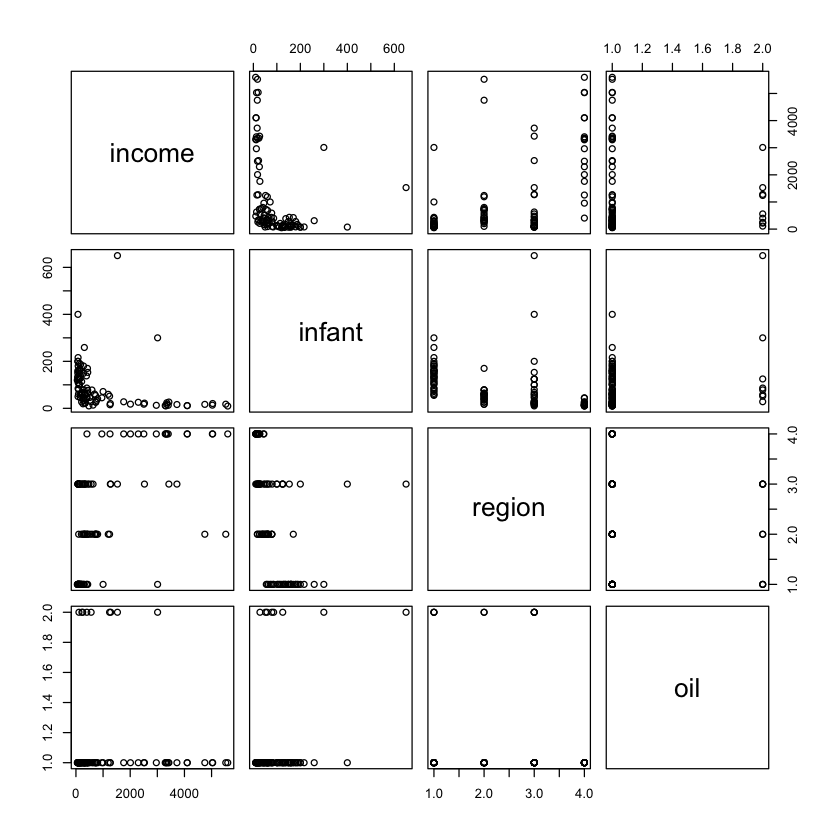

In [7]:
pairs(Leinhardt)

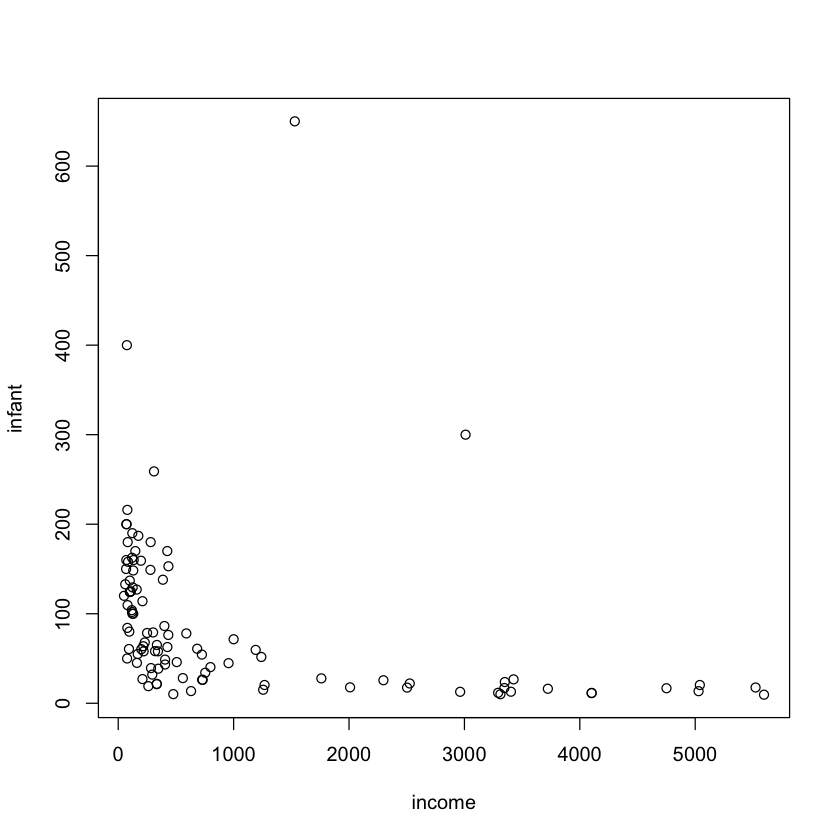

In [8]:
plot(infant ~ income, data=Leinhardt)

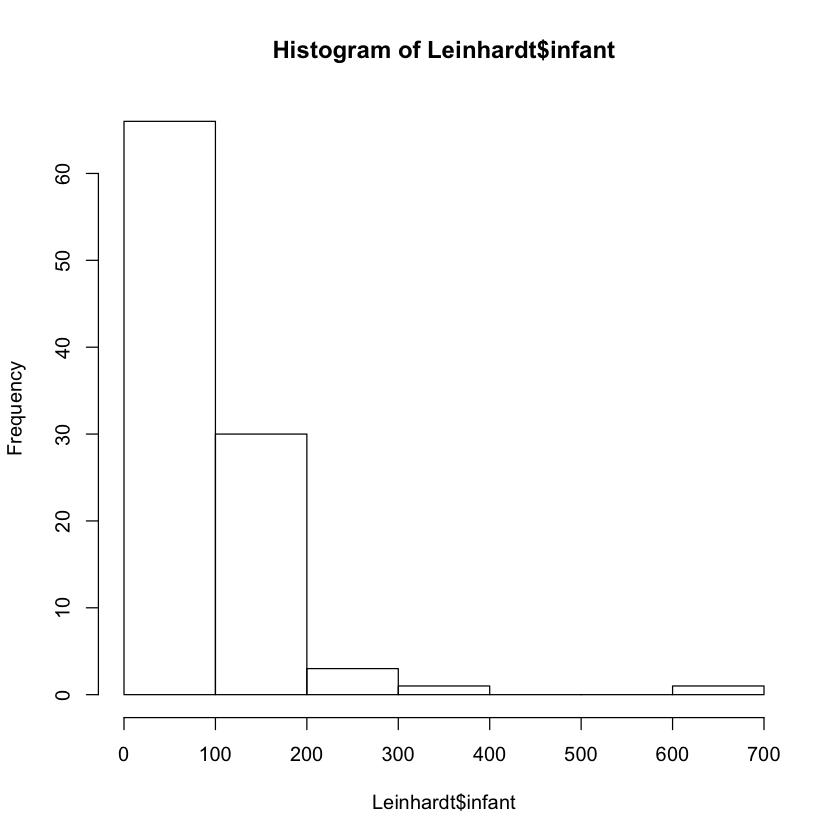

In [9]:
hist(Leinhardt$infant)

In [10]:
library('rjags')

Warning message:
“package ‘rjags’ was built under R version 3.6.3”
Loading required package: coda

Warning message:
“package ‘coda’ was built under R version 3.6.3”
Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



In [11]:
Leinhardt$loginfant = log(Leinhardt$infant)

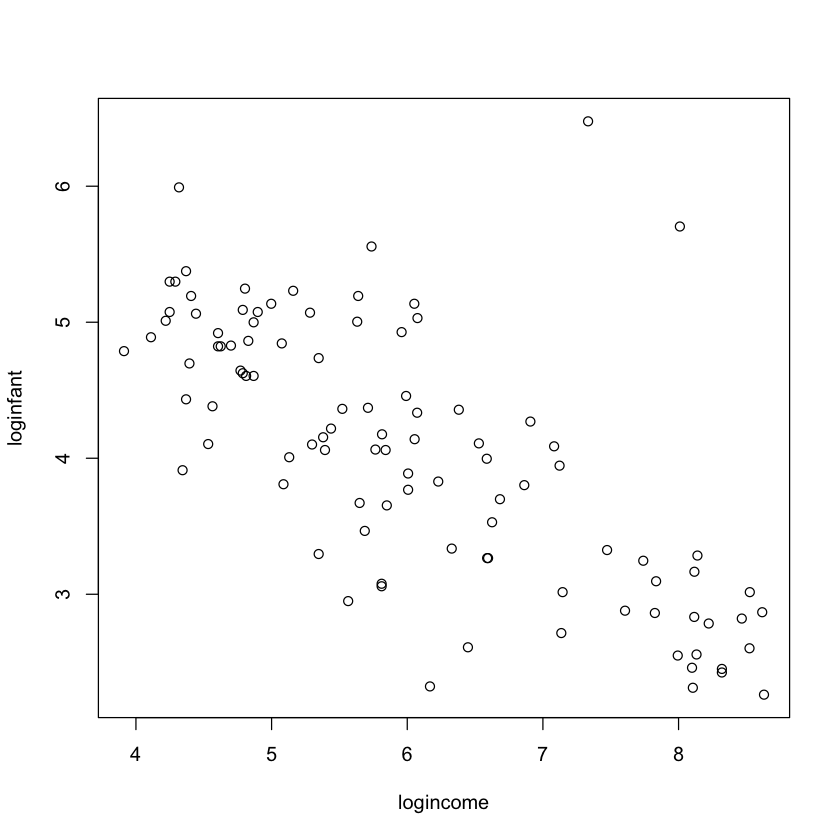

In [12]:
Leinhardt$logincome = log(Leinhardt$income)

plot(loginfant ~ logincome, data=Leinhardt)

In [13]:
lmod = lm(loginfant ~ logincome, data=Leinhardt)


In [14]:
summary(lmod)


Call:
lm(formula = loginfant ~ logincome, data = Leinhardt)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66694 -0.42779 -0.02649  0.30441  3.08415 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.14582    0.31654  22.575   <2e-16 ***
logincome   -0.51179    0.05122  -9.992   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6867 on 99 degrees of freedom
  (4 observations deleted due to missingness)
Multiple R-squared:  0.5021,	Adjusted R-squared:  0.4971 
F-statistic: 99.84 on 1 and 99 DF,  p-value: < 2.2e-16


In [15]:
dat = na.omit(Leinhardt)


In [16]:
mod1_string = " model {
    for (i in 1:n) {
        y[i] ~ dnorm(mu[i], prec)
        mu[i] = b[1] + b[2]*log_income[i] 
    }
    
    for (i in 1:2) {
        b[i] ~ dnorm(0.0, 1.0/1.0e6)
    }
    
    prec ~ dgamma(5/2.0, 5*10.0/2.0)
    sig2 = 1.0 / prec
    sig = sqrt(sig2)
} "


In [17]:
set.seed(72)
data1_jags = list(y=dat$loginfant, n=nrow(dat), 
              log_income=dat$logincome)



In [18]:
params1 = c("b", "sig")



In [19]:
inits1 = function() {
    inits = list("b"=rnorm(2,0.0,100.0), "prec"=rgamma(1,1.0,1.0))
}



In [20]:
mod1 = jags.model(textConnection(mod1_string), data=data1_jags, inits=inits1, n.chains=3)
update(mod1, 1000) # burn-in



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 101
   Unobserved stochastic nodes: 3
   Total graph size: 404

Initializing model



In [21]:
mod1_sim = coda.samples(model=mod1,
                        variable.names=params1,
                        n.iter=5000)

In [22]:
mod1_csim = do.call(rbind, mod1_sim) # combine multiple chains


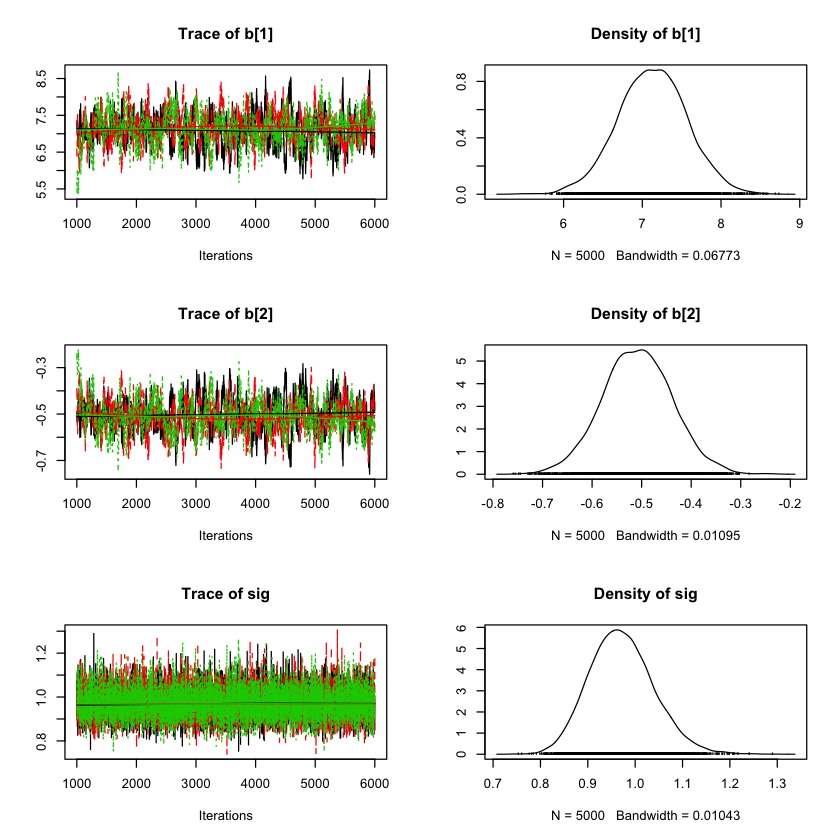

In [23]:
plot(mod1_sim)

In [1]:
options()

$CBoundsCheck
[1] FALSE

$HTTPUserAgent
[1] "R (3.6.1 x86_64-apple-darwin13.4.0 x86_64 darwin13.4.0)"

$OutDec
[1] "."

$PCRE_limit_recursion
[1] NA

$PCRE_study
[1] 10

$PCRE_use_JIT
[1] TRUE

$add.smooth
[1] TRUE

$bitmapType
[1] "quartz"

$browser
[1] "/usr/bin/open"

$browserNLdisabled
[1] FALSE

$check.bounds
[1] FALSE

$citation.bibtex.max
[1] 1

$continue
[1] "+ "

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly" 

$crayon.enabled
[1] TRUE

$defaultPackages
[1] "datasets"  "utils"     "grDevices" "graphics"  "stats"     "methods"  

$demo.ask
[1] "default"

$deparse.cutoff
[1] 60

$device
function (filename = null_filename, ...) 
ok_device(filename, ...)
<bytecode: 0x7fa537602498>
<environment: 0x7fa537601d60>

$device.ask.default
[1] FALSE

$digits
[1] 7

$dvipscmd
[1] "dvips"

$echo
[1] FALSE

$editor
[1] "vi"

$encoding
[1] "native.enc"

$example.ask
[1] "default"

$expressions
[1] 5000

$help.search.types
[1] "vignette" "demo"     "help"   